# Student Performance Indicator

## Life cycle of a Machine Learning Project

1. Understanding the problem statment
2. Data collection
3. Data checks to perform
4. Exploratory data analysis(EDA)
5. Data pre precessing
6. Model training
7. Model Selection

## 1. Understanding the problem statement 
 
The goal of this project is to understand how a student's perforance of test is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and test preparation course.

## 2.  Data Collection

* Data source - [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
* Columns - gender, race/ethnicity, parental level of educatoin, lunch, test preparation course, math score, reading score, writing score
* We have 1000 rows of data with all teh above attributes



### 2.1 Importing the data and Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")

##### Taking a look at the head

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### Finding the shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information ( based on information on kaggle)

* gender: sex of students -> Male or Female
* race/ethnicity -> Group A, B, C, D
* Parental level of education -> bachelor's degree, some college, master's degree, associate's degree, high school
* lunch: having lunhc before the test standard or free/reduced
* test preparation couse: comlete or not complete before the test
* math score 
* reading score
* writing score

## 3. Data checks to perform

* Check missing values
* check for duplicates
* check data types
* check the number of unique values of each column
* check teh statistics of data set
* check various categories present in the diffrent cateforical column

### 3.1 Check missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

no missing values in the dataset great

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

No duplicate values in the data set

### 3.3 Check data type of each column 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Inisights
* From above description of numerical data, all means are very close to each other - between 66 and 69.17 ( range of 3.17)
* All standard deviations are close - between 14.6 and 15.19
* While there is a minimum score of 0 for math, for wriing and reading are much higher 10 and 17 respectively

### 3.5 Exploring each coumn of data

#### Gender

In [10]:
print(f"Categories in 'gender' column: {df.gender.unique()}" )

Categories in 'gender' column: ['female' 'male']


#### Race/Ethnicity

In [11]:
print(f"Categories in 'race/ethnicity' variable: {df['race/ethnicity'].unique()}")

Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']


#### Parental level of education

In [12]:
print(f"categories in 'parental level of education' column: {df['parental level of education'].unique()}" )

categories in 'parental level of education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


#### Lunch

In [13]:
print(f"Categories in 'lunch' column: {df['lunch'].unique()}")

Categories in 'lunch' column: ['standard' 'free/reduced']


#### Test Preparation

In [14]:
print(f"Categories in 'test preparation course' variable: {df['test preparation course'].unique()}" )

Categories in 'test preparation course' variable: ['none' 'completed']


#### Getting numerical & categorical feutures

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical features: {numerical_features}')
print(f"we have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.6 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
len_scores = len(numerical_features)
df['average'] = df['total score']/len_scores

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [17]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full point in math {math_full}")
print(f"Number of students with full points in writing {writing_full}")
print(f"Number of student with full points in reading {reading_full}")

Number of students with full point in math 7
Number of students with full points in writing 14
Number of student with full points in reading 17


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with math scores less than 20: {math_less_20}")
print(f"Number of student with writing scores less than 20: {writing_less_20}")
print(f"number of students with read scores less than 20: {reading_less_20}")

Number of students with math scores less than 20: 4
Number of student with writing scores less than 20: 3
number of students with read scores less than 20: 1


#### Insights
* From the above values we get students have performed worst in Maths
* The best performance overall is in reading

## 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusions

* Histogram
* Kernet Distribution Function(KDE)

#### 4.1.1 Histogram & KDE

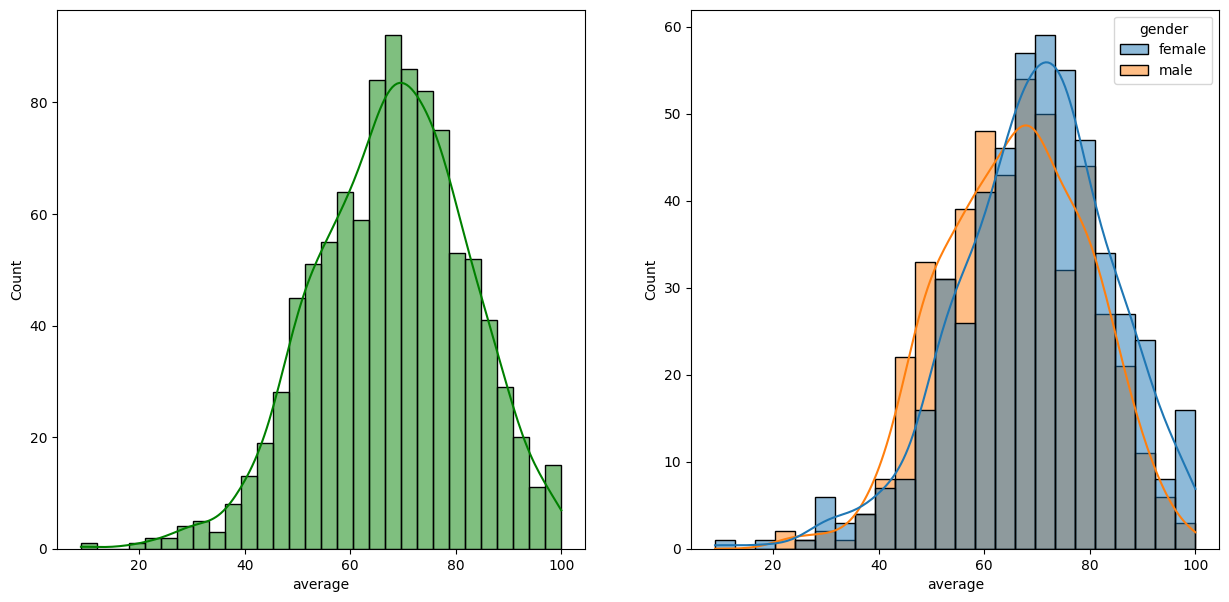

In [20]:

fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

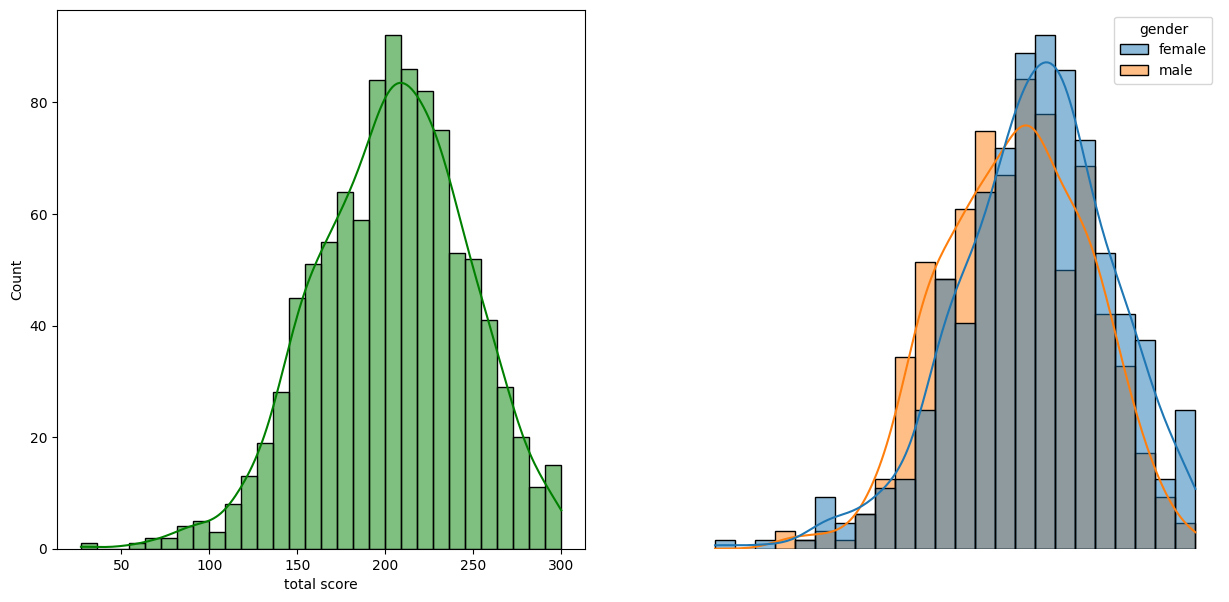

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.axis('off')
plt.show()

##### Insights
* Base on the overall trend female students tend to perform better in this dataset

<Axes: xlabel='average', ylabel='Count'>

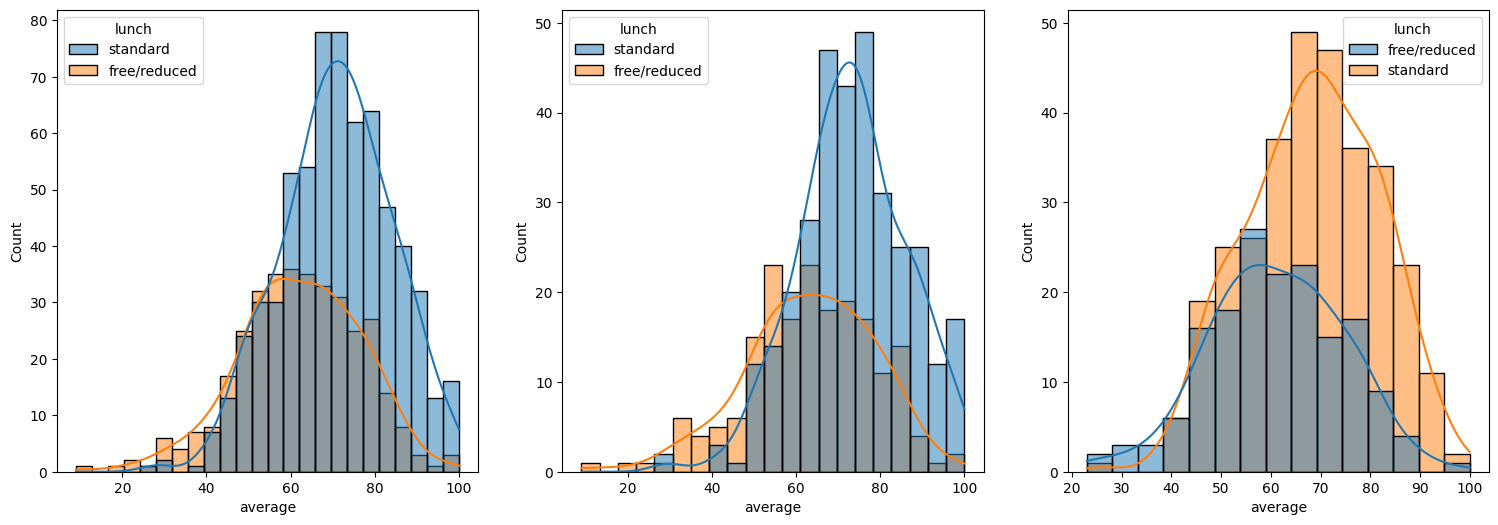

In [22]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

##### Insights
* It is clear that overall lunch help students have better scores
* The above conclusion holds wether it is a male or female student

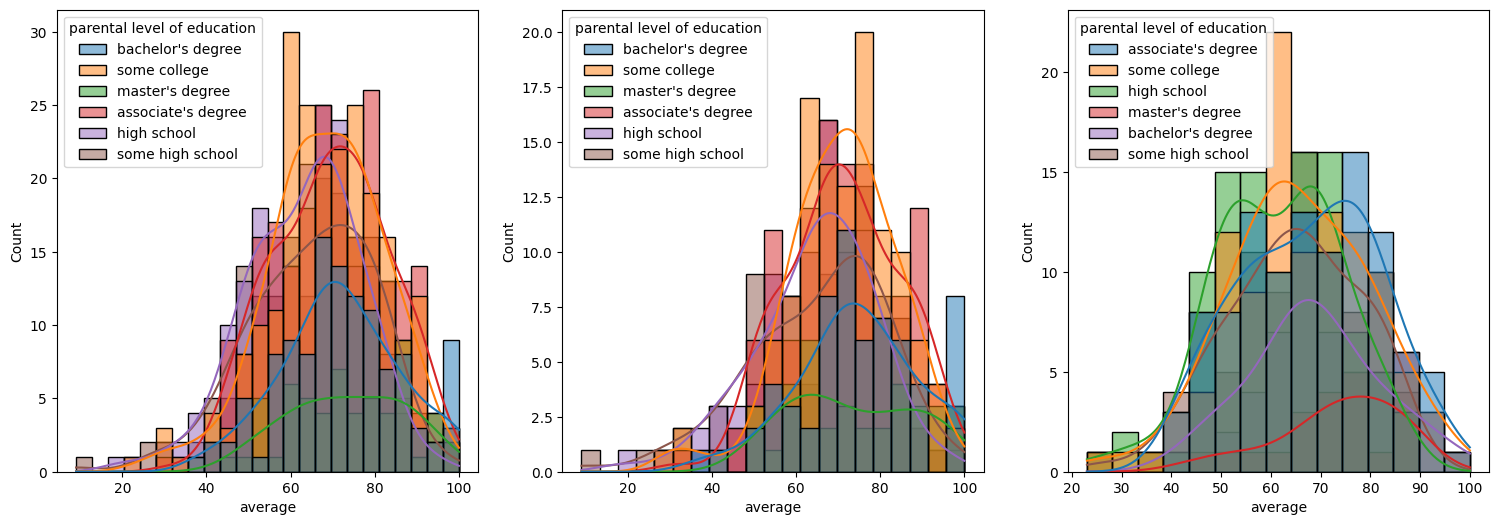

In [23]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')

##### Insights
* In general the level of education doesn't seem to have the highest impact on student success 

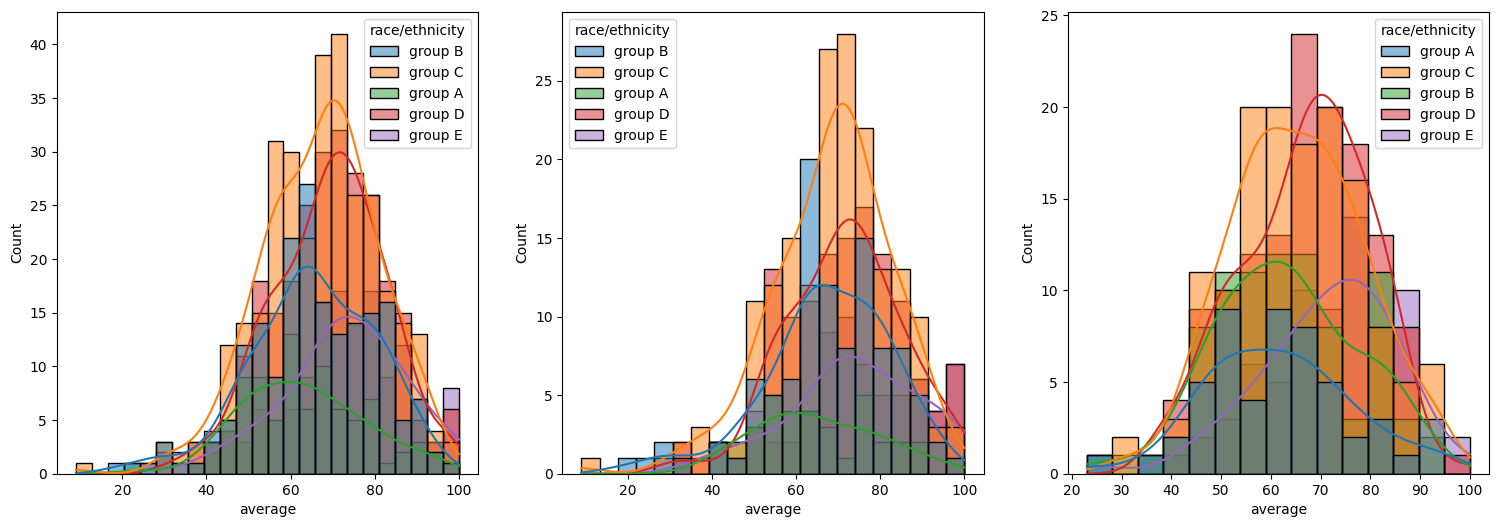

In [24]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax= sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity')

##### Insights
* Students in group A and B tend to have the worse performance
* students in group E and D tend to have better performance

### 4.2 Analysis of the scores of students in individual subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

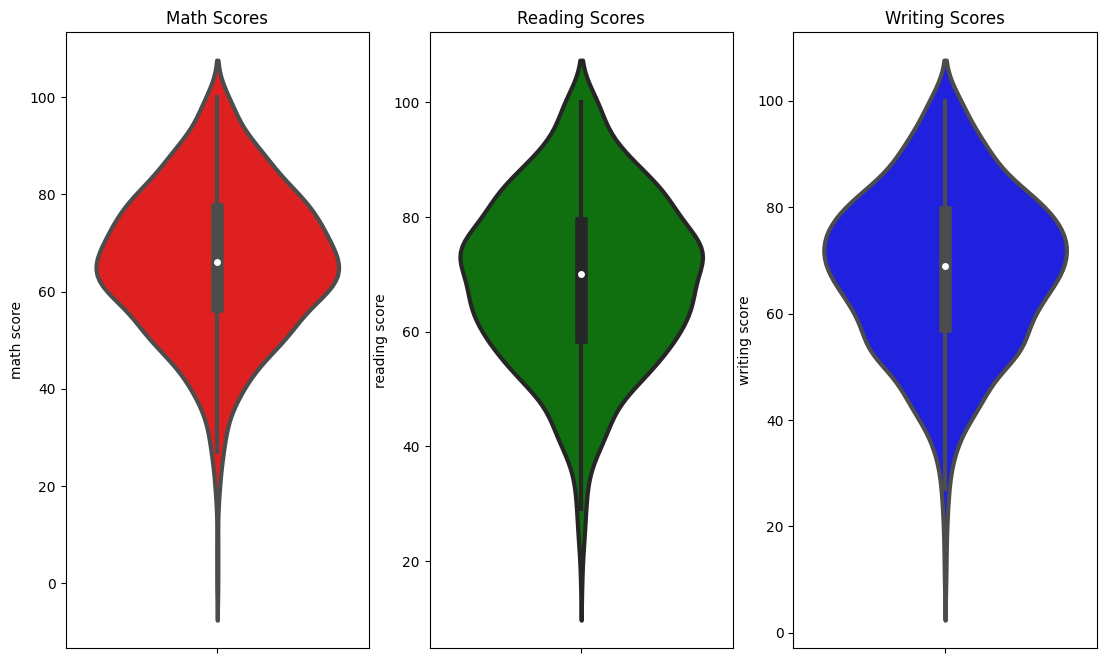

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

### 4.3 Multivariate analysis using pieplot

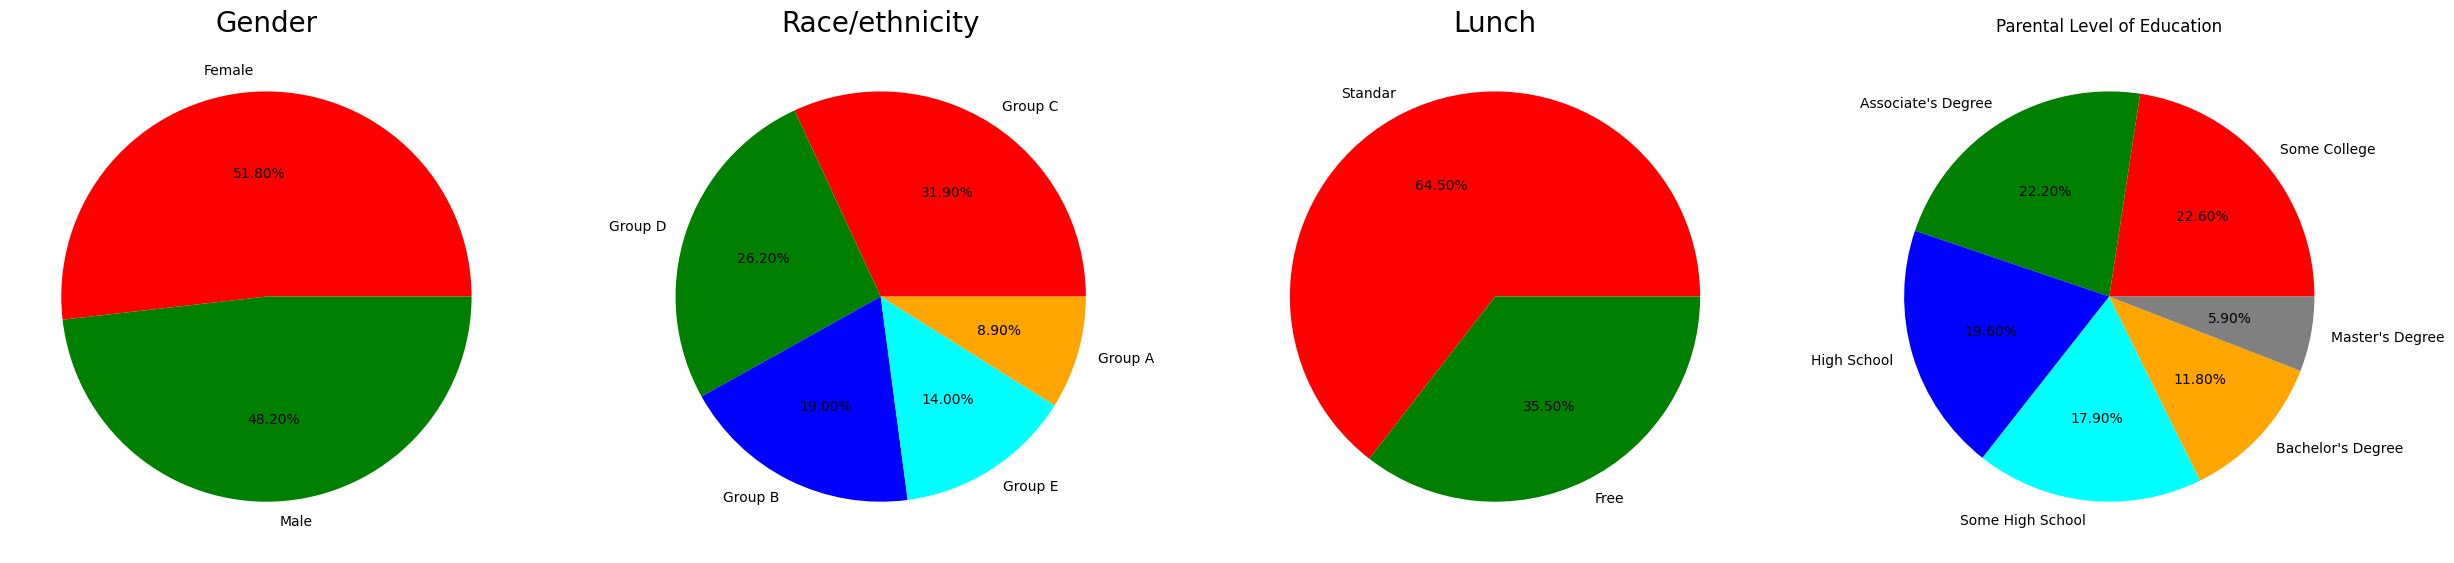

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', "Male"
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title("Gender", fontsize=20)
plt.axis('off')

plt.subplot(152)
size= df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standar', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(154)
size = df['test preparation course'].value_counts()
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education')
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#### Insights
* Number of male and female students are mostly the same
* The number of students is greates in group C and smallest in group A
* Most students have standard lunches
* There is a small level of students whose parent's have a master's level of education and most parents got some college level of education 

### 4.4 Feature wise visualization

#### 4.4.1 Gender Column

* how is the distribution of students?
* Does gender have an impact on performace?

##### Univariate analysis (gender distribution)

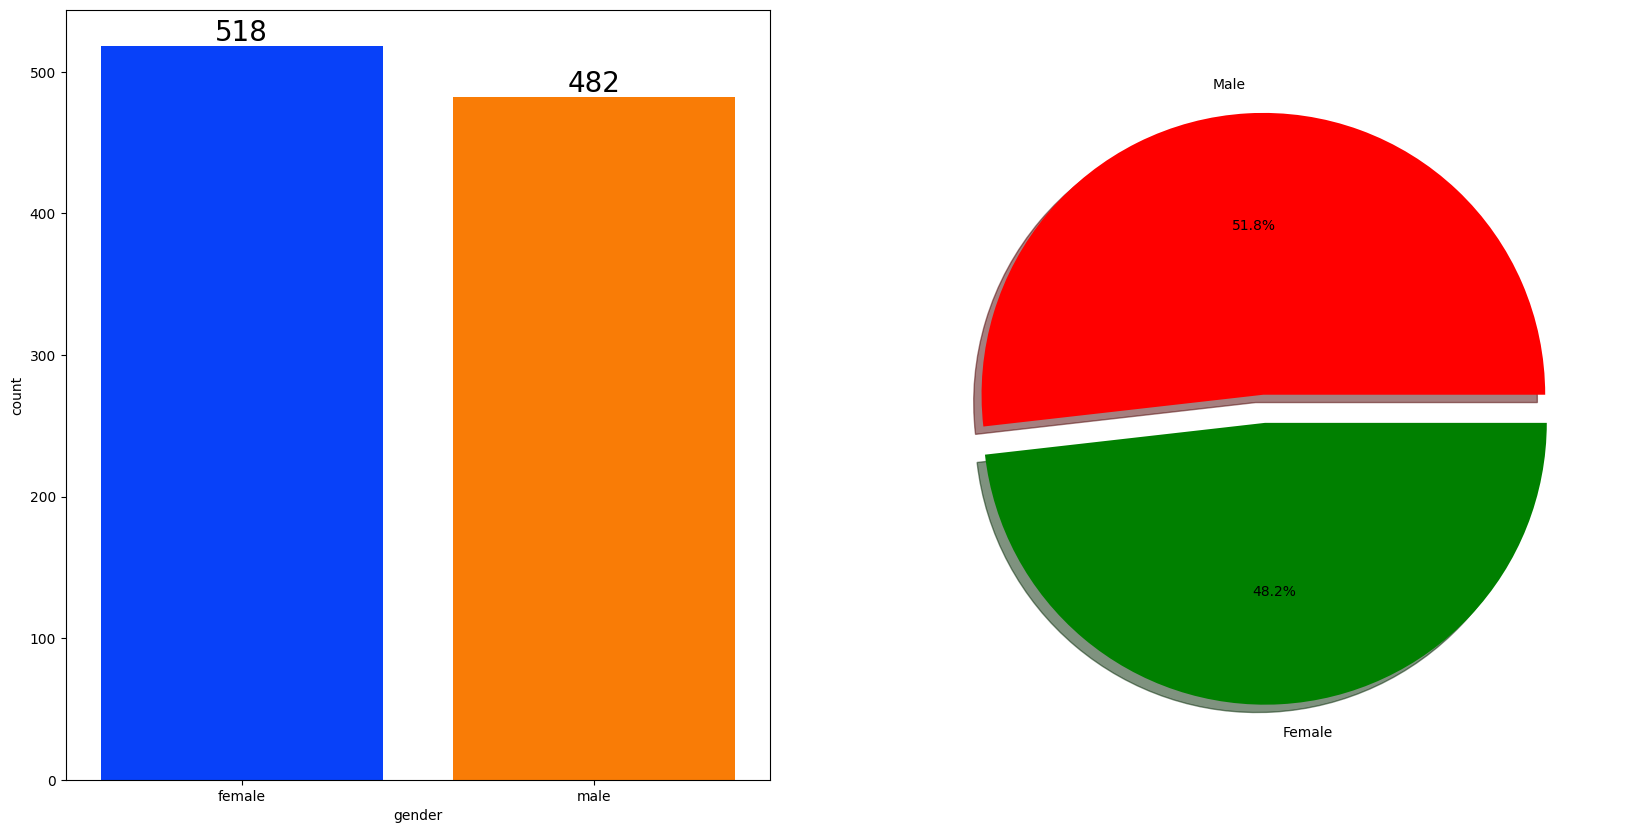

In [27]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['red','green'])
plt.show()

##### Insights
* Gender have a balanced distribution

##### Bivariate Analysis (Gender and performance)

In [29]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group.head()

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


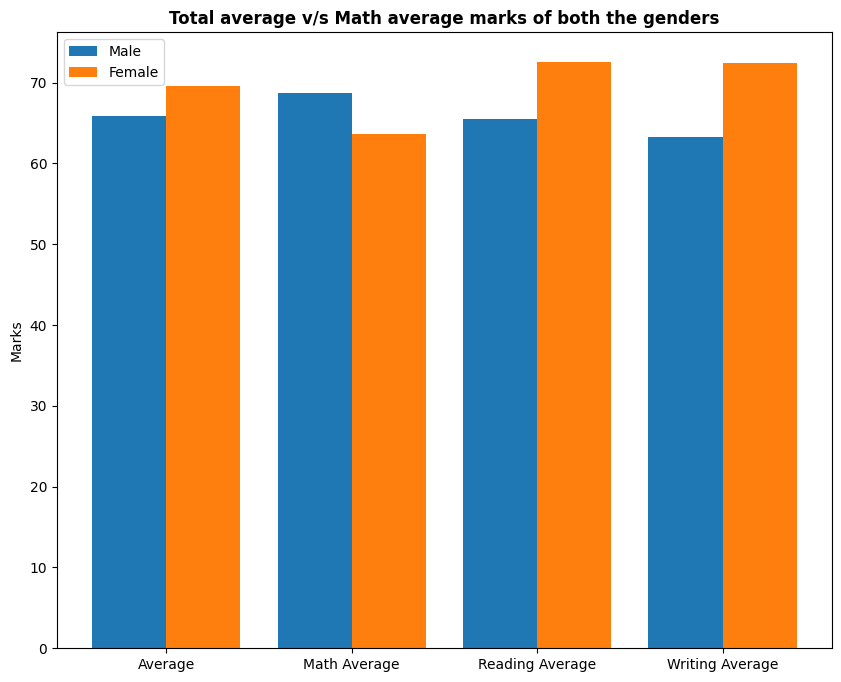

In [31]:
plt.figure(figsize=(10, 8))

X = ['Average','Math Average', 'Reading Average', 'Writing Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0], gender_group['reading score'][0], gender_group['writing score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1], gender_group['reading score'][1], gender_group['writing score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()




##### Insights 
* On average females do better than man
* When it comes to specific subjects female only do better than man in reading and writing
* Man do better than woman in math

#### 4.4.2 RACE/ETHNICITY COLUMN
* What does the distribution of diffrent group look like ?
* How does race/ethinicity impact a student's performance ?

##### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

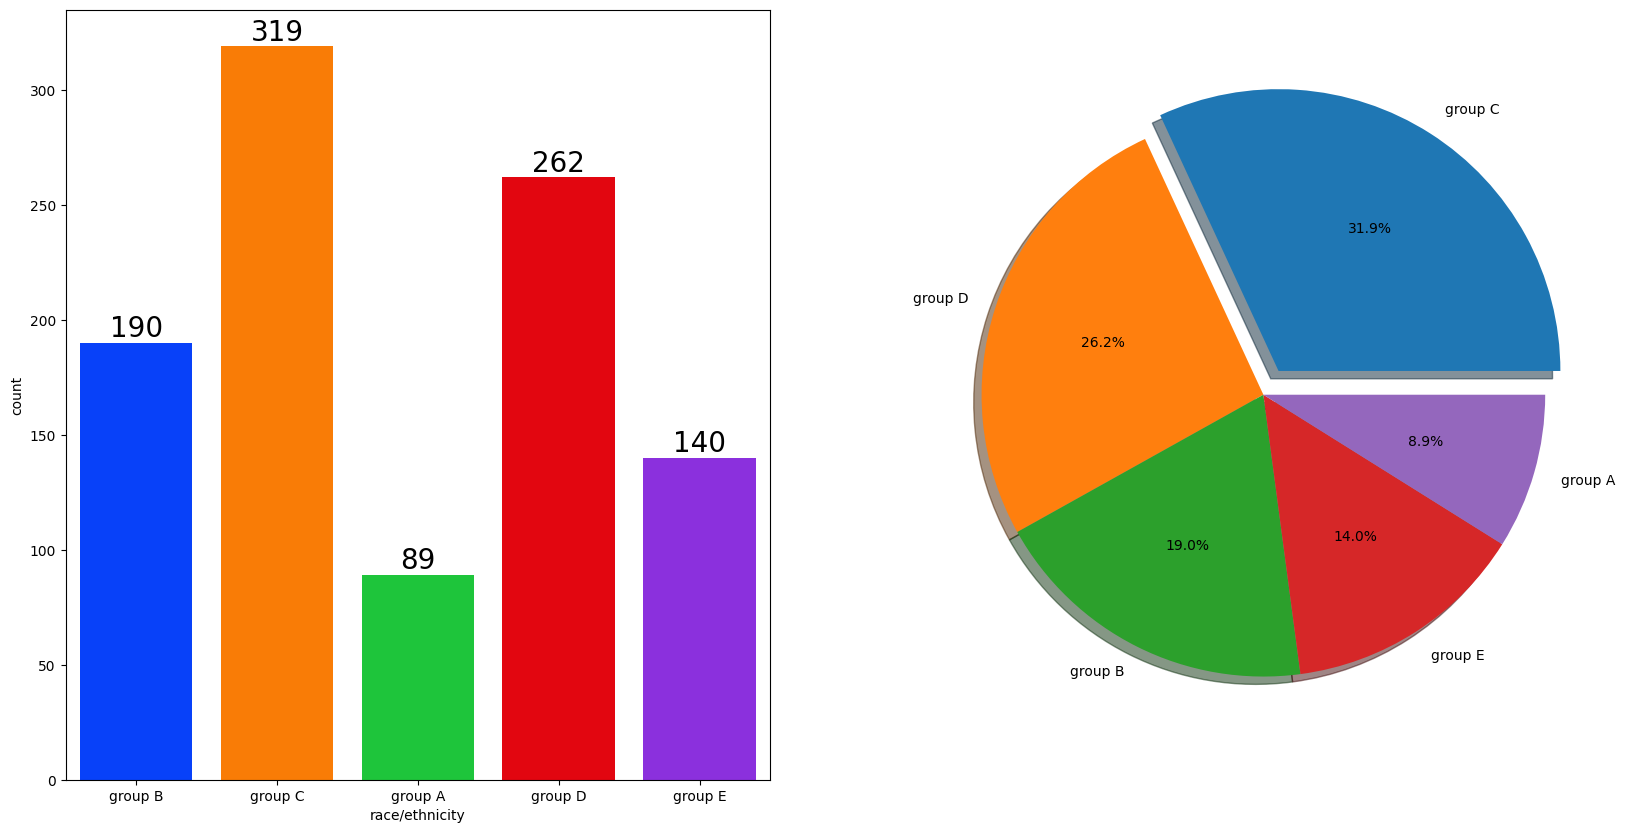

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

##### Insights 
* Group C and Group B are the most represented groups
* Lowest number of students are in group A

##### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

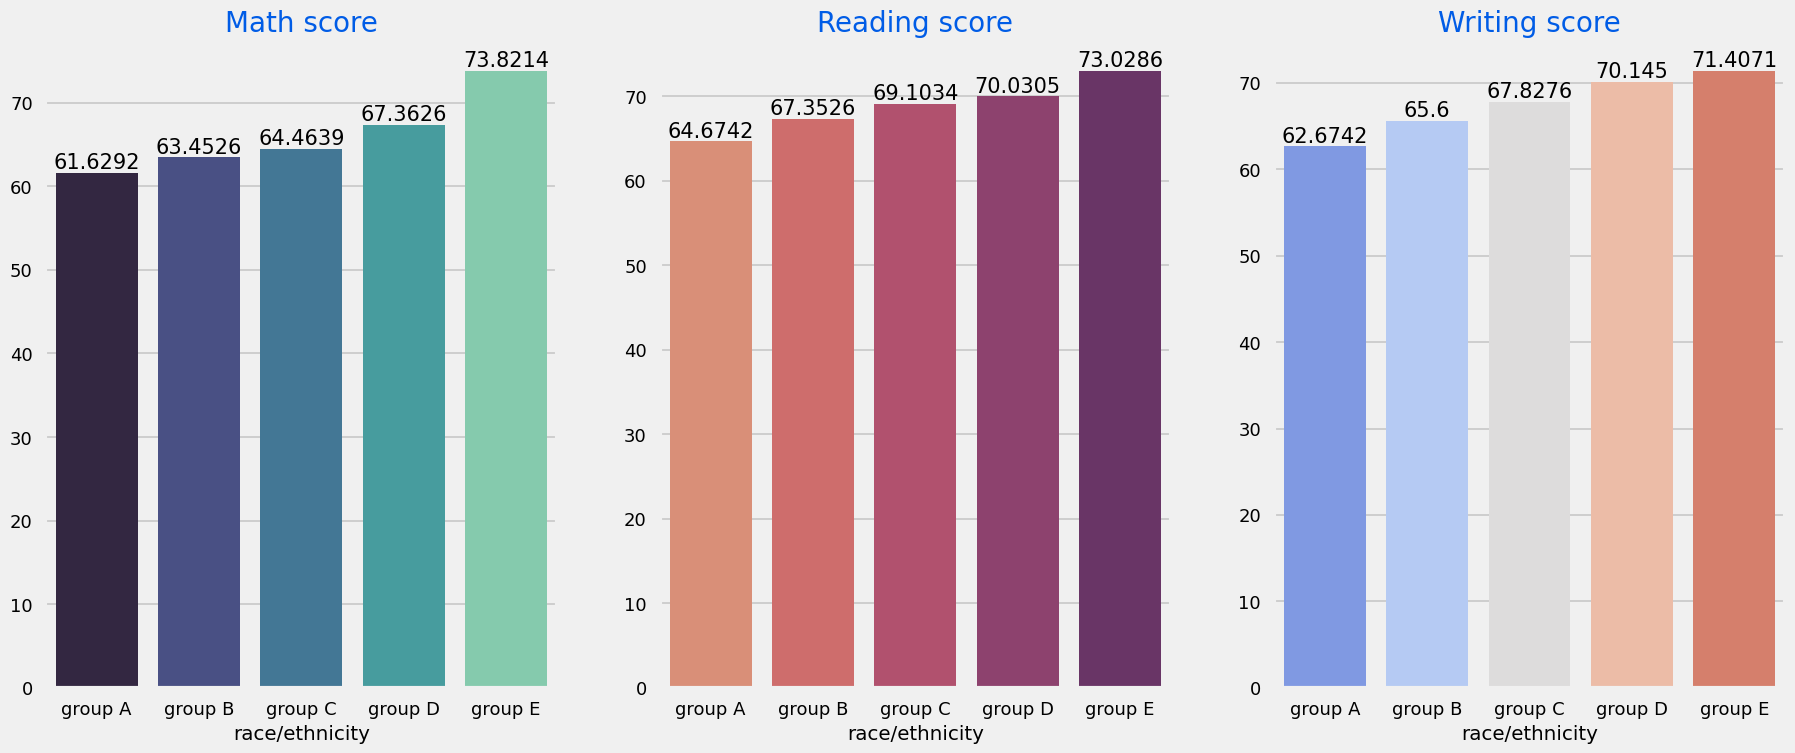

In [41]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights

* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower representation have a lower avg in all course subjects

#### 4.4.3 Parental Level of education

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

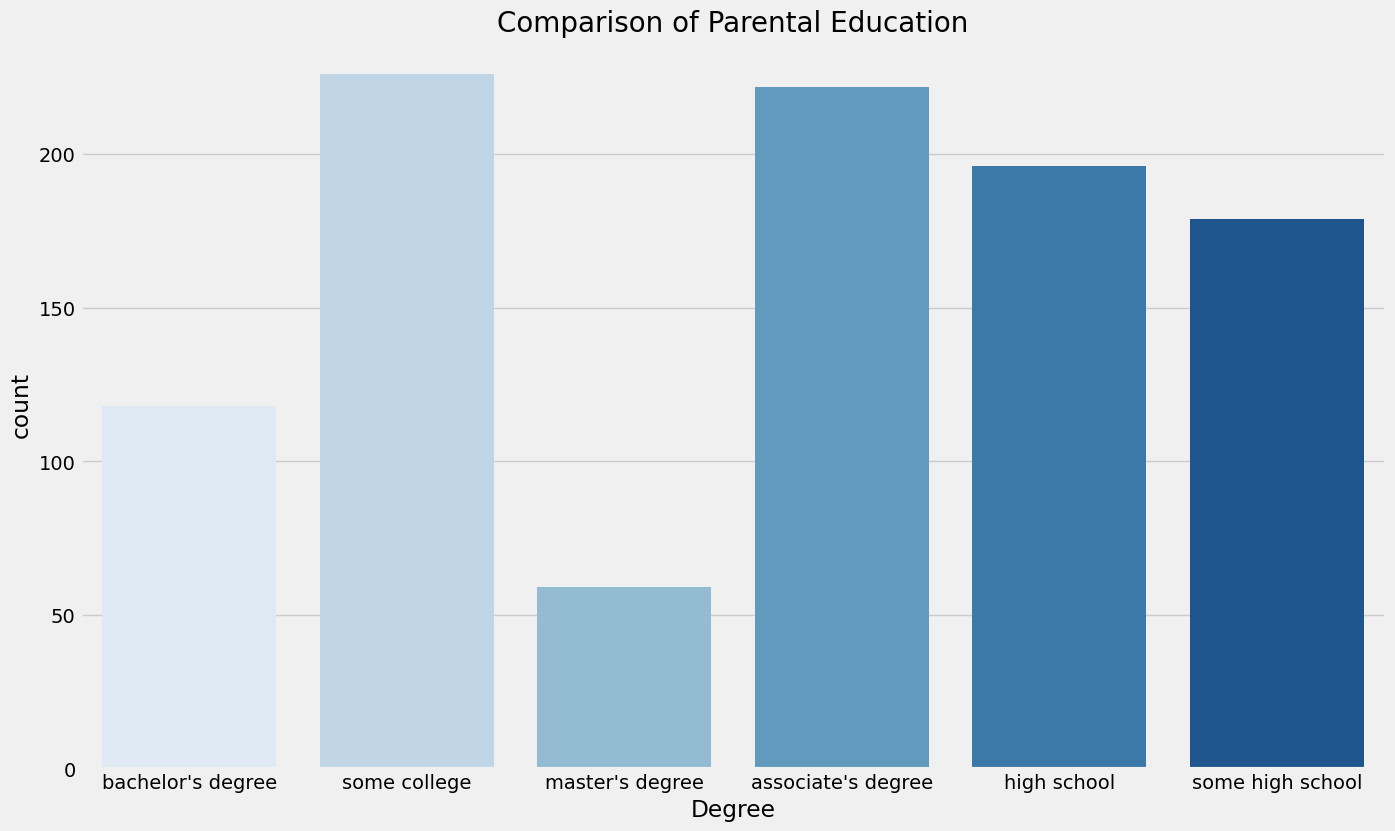

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

###### Inights

* Most parents when to some college or have an associate's degree
* A very small number of parents have a master's degree

##### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

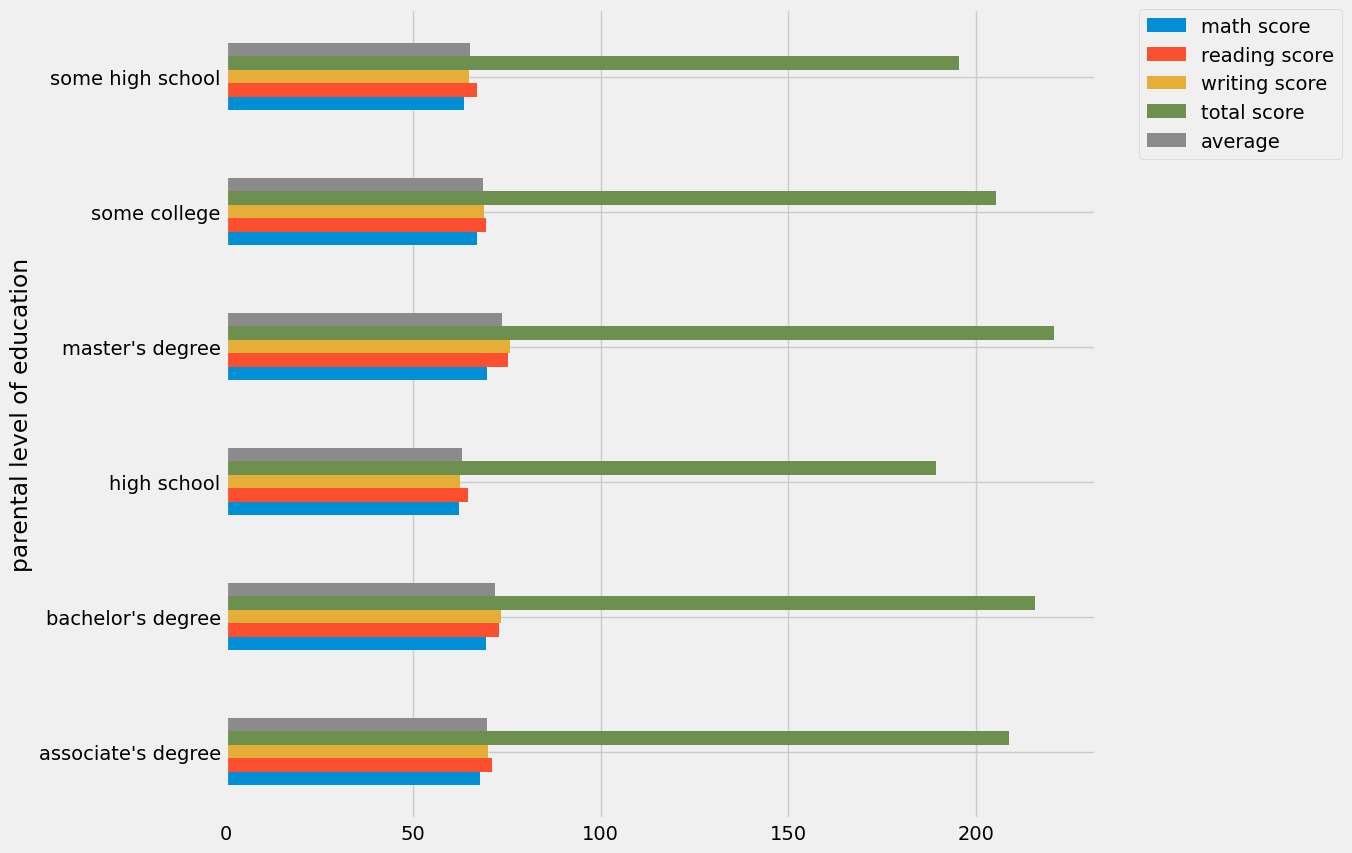

In [37]:
df.groupby('parental level of education').agg('mean', numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

###### Inisights

* The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

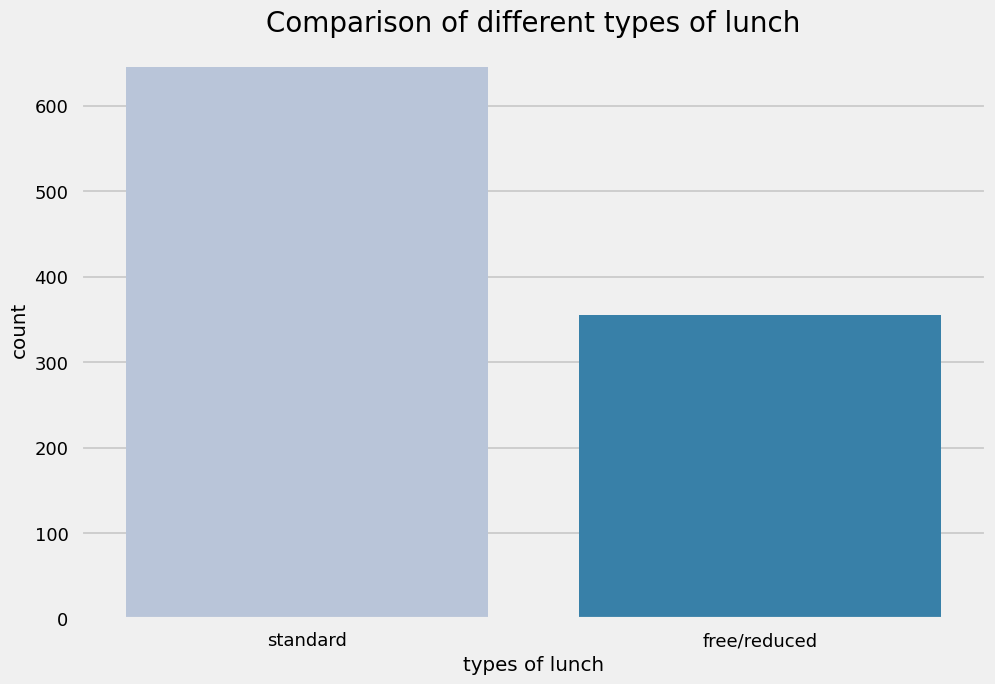

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

###### Insights

* Students being served Standard lunch was more than free lunch

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

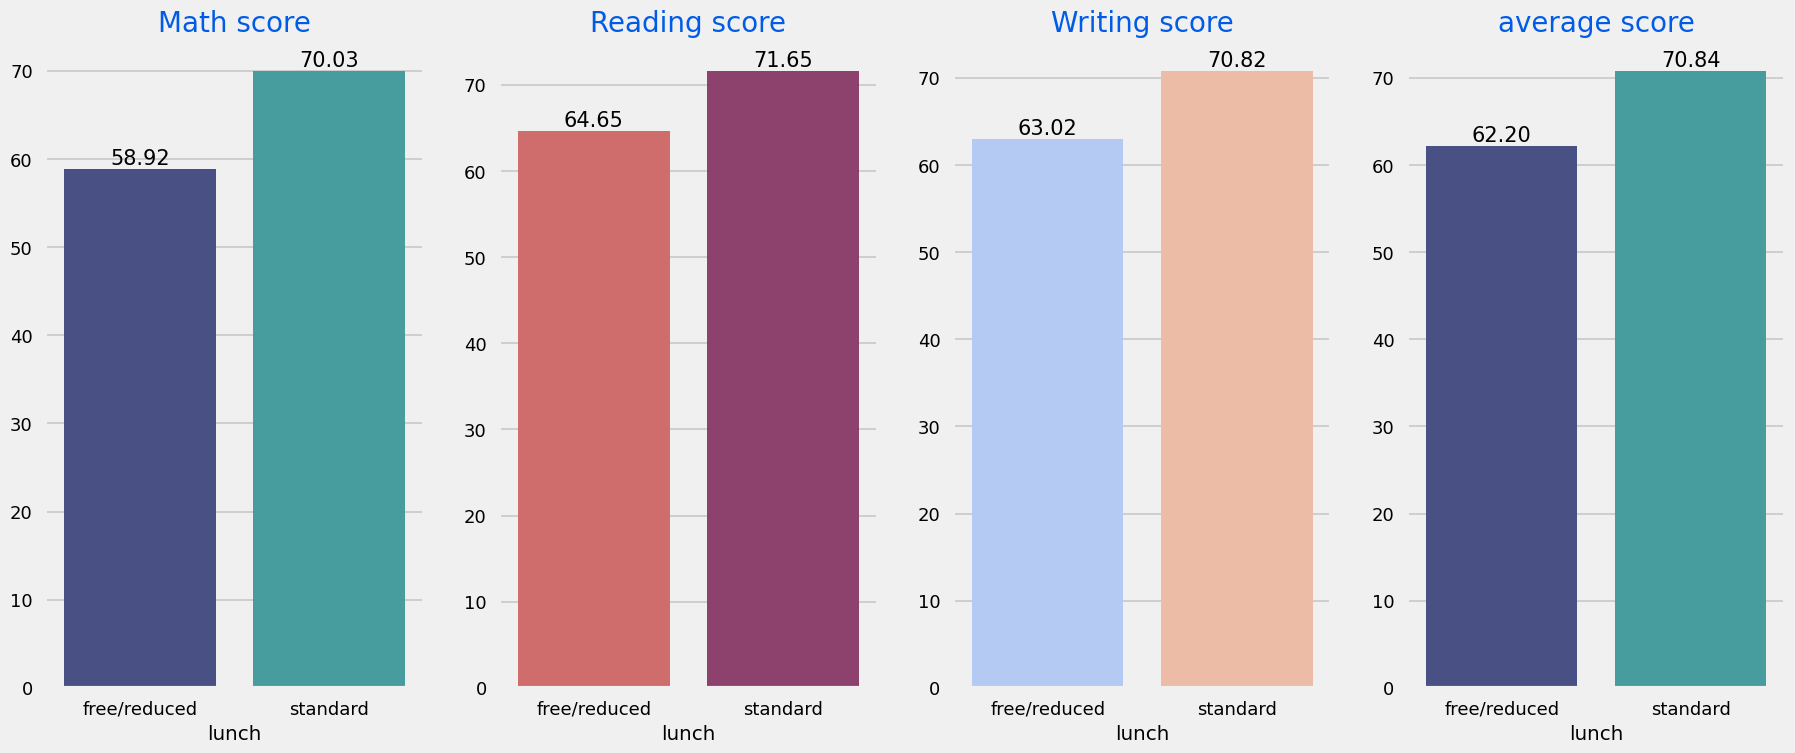

In [56]:
lunch_agg=df.groupby('lunch')
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.barplot(x=lunch_agg['math score'].mean().index,y=lunch_agg['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fmt='%.2f')

sns.barplot(x=lunch_agg['reading score'].mean().index,y=lunch_agg['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%.2f')

sns.barplot(x=lunch_agg['writing score'].mean().index,y=lunch_agg['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%.2f')

sns.barplot(x=lunch_agg['average'].mean().index,y=lunch_agg['average'].mean().values,palette = 'mako',ax=ax[3])
ax[3].set_title('average score',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=15, fmt='%.2f')

###### Insights 
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN

* Do most student take the test preparation course ?
* Is Test prepration course has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( Do most student take the test preparation course ? )

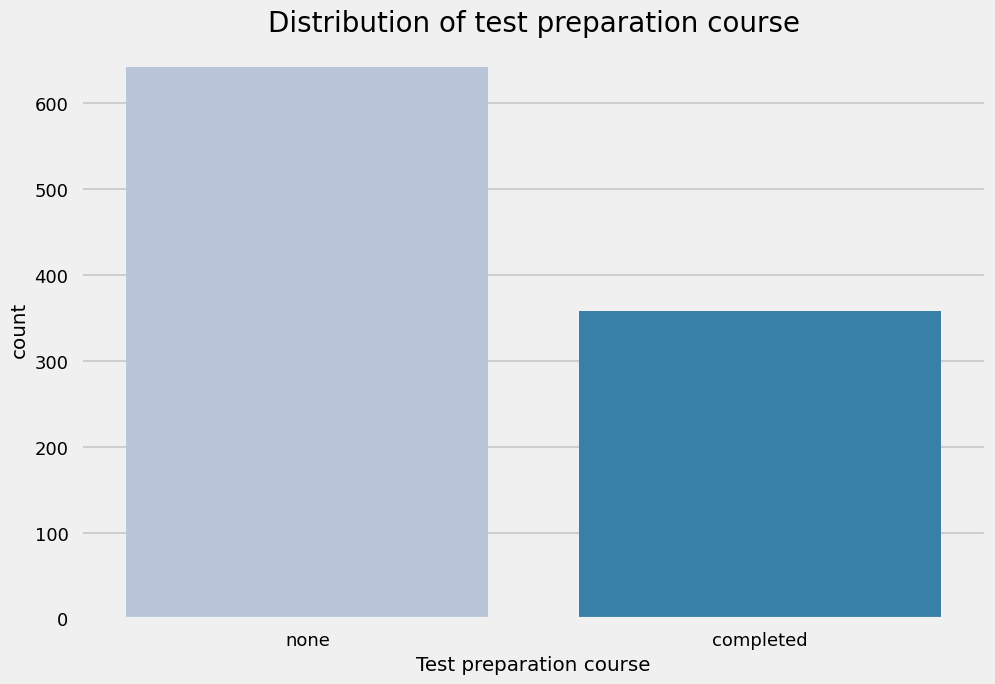

In [57]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['test preparation course'], palette = 'PuBu')
plt.title('Distribution of test preparation course', fontweight = 30, fontsize = 20)
plt.xlabel('Test preparation course')
plt.ylabel('count')
plt.show()

###### Insight

* Most students chose not to take the test preparation course

##### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='test preparation course', ylabel='average'>

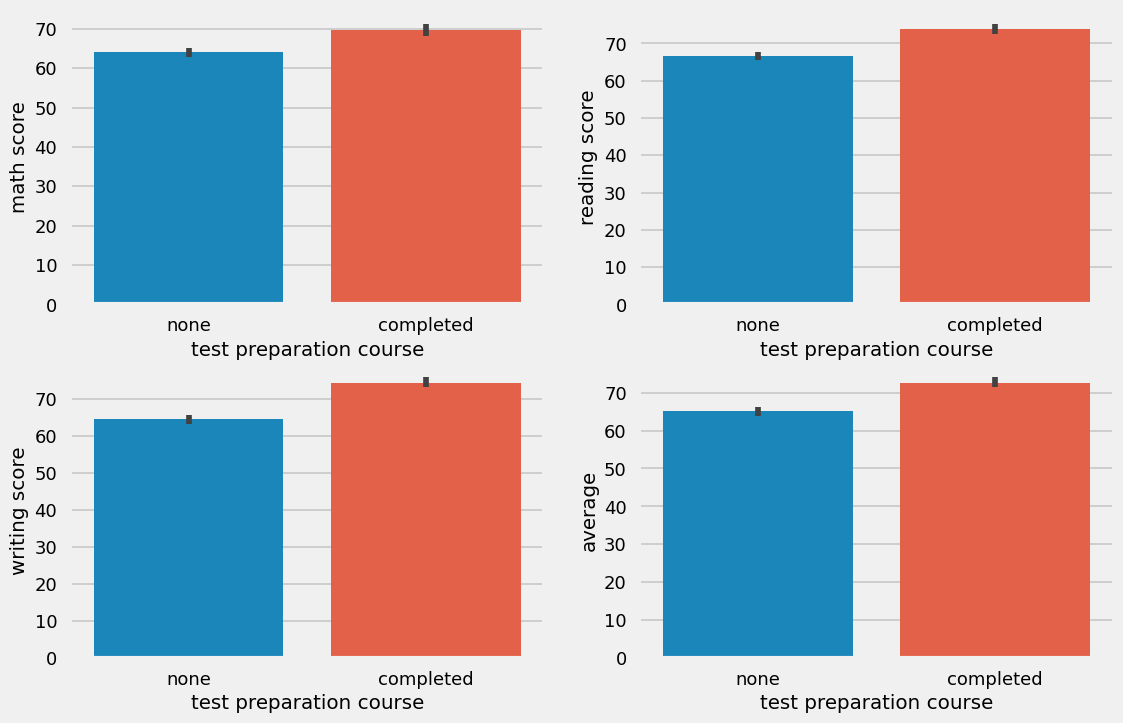

In [61]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot (x=df['test preparation course'], y=df['math score'])
plt.subplot(2,2,2)
sns.barplot (x=df['test preparation course'], y=df['reading score'])
plt.subplot(2,2,3)
sns.barplot (x=df['test preparation course'], y=df['writing score'])
plt.subplot(2,2,4)
sns.barplot (x=df['test preparation course'], y=df['average'])

###### Insights

* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

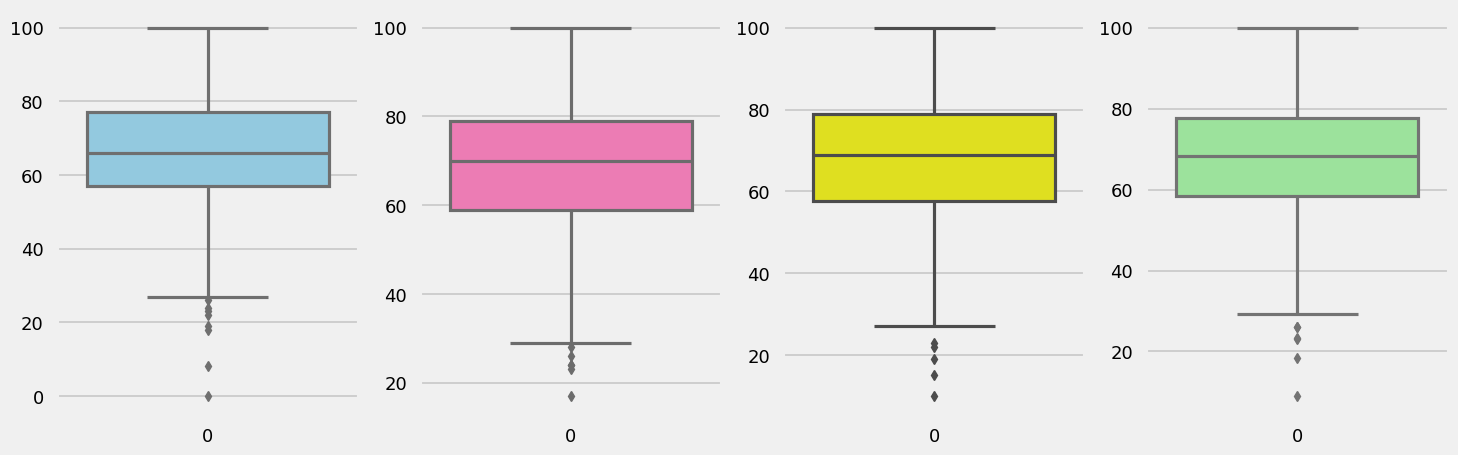

In [62]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

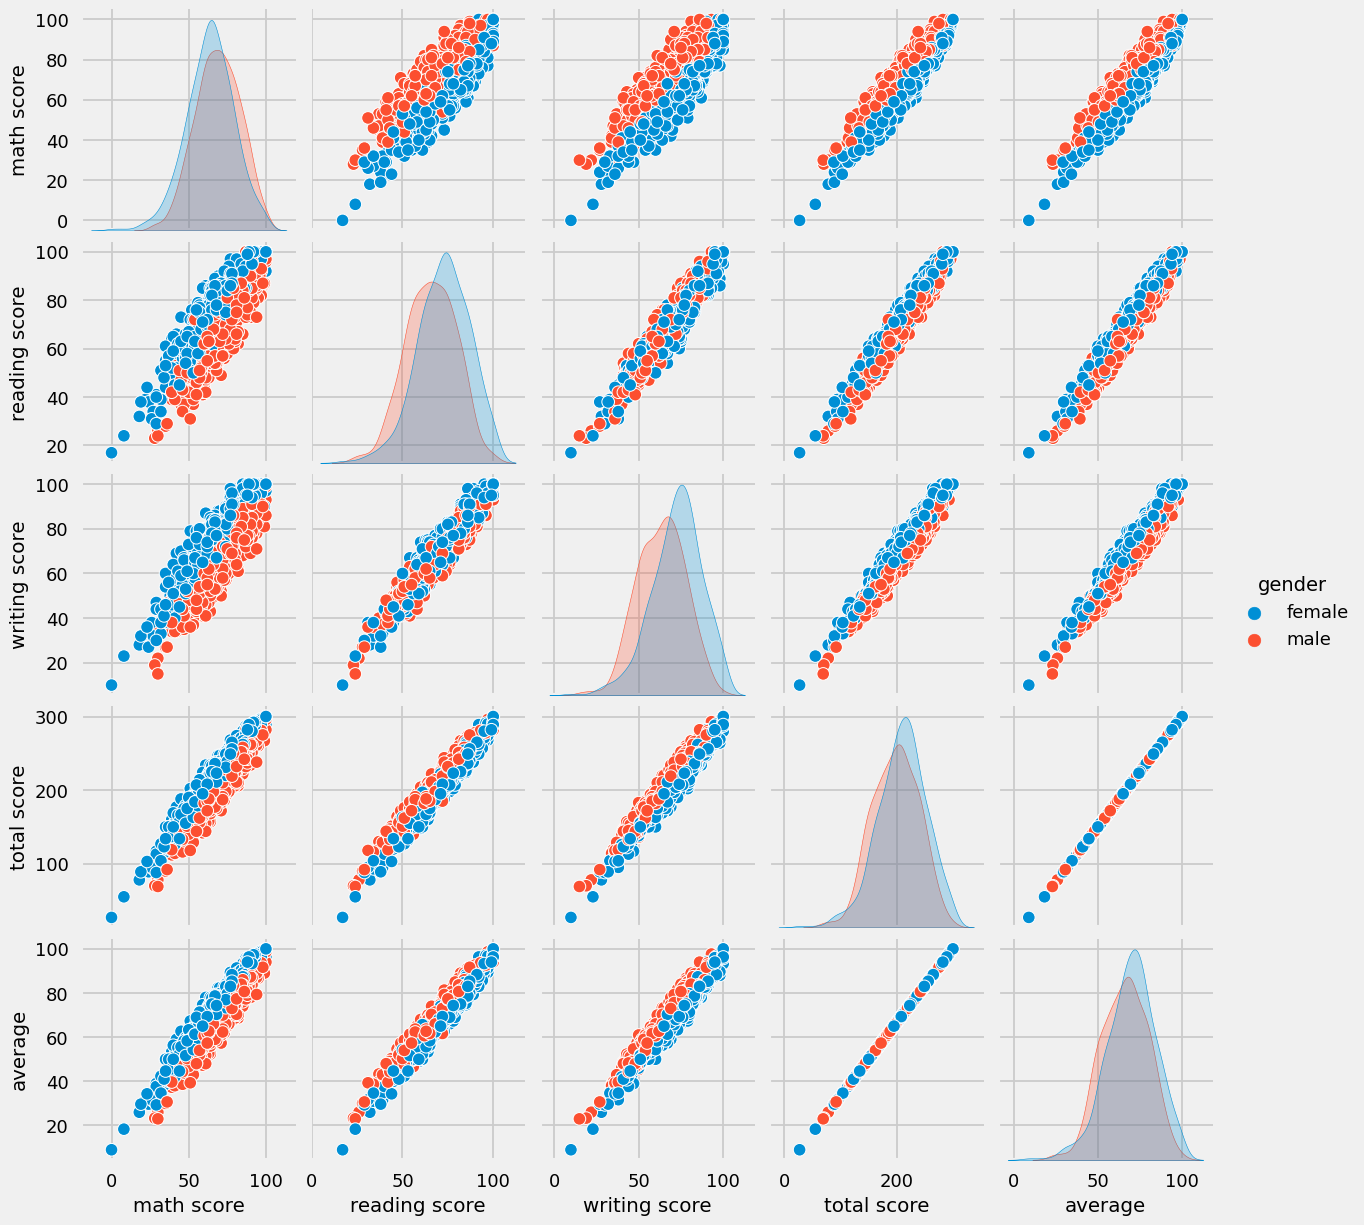

In [63]:
sns.pairplot(df,hue = 'gender')
plt.show()

### 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.